This will show how exactly to extract the coefficients of two linearly combined linearly independent vectors.
The formula is $(A^t A)^{-1} A^t d $, where A is a design matrix. In this instance, a constant, linear, and quadratic term. d is the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import read
import sys
sys.path.insert(0, '/home/noah/Desktop/large_analysis/ca_analysis')
import fileread as fr
from scipy.optimize import curve_fit
from scipy.signal import fftconvolve
import predefined as pd
import wave_ops as wo
reload(read)
#Reading in WF's#

def wave(t,amp,t0,tau1,tau2):
    wave=np.zeros(len(t))
    wave[t>t0]=amp*(np.exp(-(t[t>t0]-t0)/tau1)-np.exp(-(t[t>t0]-t0)/tau2))
    return wave

#HERE I'M JUST TRYING TO GET AN APPROXIMATE FORM OF THE "REAL" PULSE
#TAKEAWAY: DIFFERENCE OF EXPONENTIALS (A(EXP(-(t-t0))/TAU1)-EXP(-(t-t0)/TAU2))
fs=25
i=6
d=read.read_bl2('s_0537_r_000312_1.dat')
for j in range(len(d)):
    d['wave'][i][:]-=int(np.mean(d['wave'][i]))
t=np.arange(len(d['wave'][i]),dtype=float)
plt.figure(figsize=(20,15))
plt.tick_params(labelsize=fs)
av=np.mean(d['wave'][i][0:400])
pars=[7.5e3,520,200,20]
plt.plot(t,d['wave'][i]-av,label='Test waveform')
pars=curve_fit(wave,t,d['wave'][i]-av,p0=pars)[0]
print pars
fpars=[441,3.6]
plt.plot(t,wave(t,*pars),lw=5,label='fitted diff of exponentials')
plt.legend(fontsize=fs)
plt.show()

ImportError: No module named read

In [2]:
# We'll use this to make an array with a linear combination of 
#  y=1, y=x, and y=x^2 as our data
def linearCombine(N,a1,b1,a2,b2,a3,b3,a4,b4,a5,b5,c,d,e):# (N,*pars):
    v=np.zeros((13,N)) #np.zeros((len(pars),N))
    a=[a1,a2,a3,a4,a5]
    b=[b1,b2,b3,b4,b5]
    t=np.arange(N,dtype=float)
    for i in range(5):
        w=2*np.pi/float((i+1)*500)
        v[2*i,0:N]=a[i]*np.sin(w*t)
        v[2*i+1,0:N]=b[i]*np.cos(w*t)
    v[10,0:N]=c*wave(np.arange(N,dtype=float),1,pars[1],*fpars)
    v[11,0:N]=d*np.arange(N,dtype=float)
    v[12,0:N]=e
    return np.sum(v,axis=0)

# Here I make a linear combination of the function. I use 1,2,3 for simplicity
fs=25 
N=len(d['wave'][i]); 

#Data = linearCombine(N,1,2,3,4,5,6,7,8,9,0)
Data=d['wave'][i]
#noise = np.random.normal(scale=0.,size=N)
#Data = Data+noise
plt.figure(figsize=(15,10))
t=np.arange(N)
plt.plot(t,Data,label=r'Davids test waveform')
plt.tick_params(labelsize=25)
plt.legend(fontsize=fs)
plt.show()


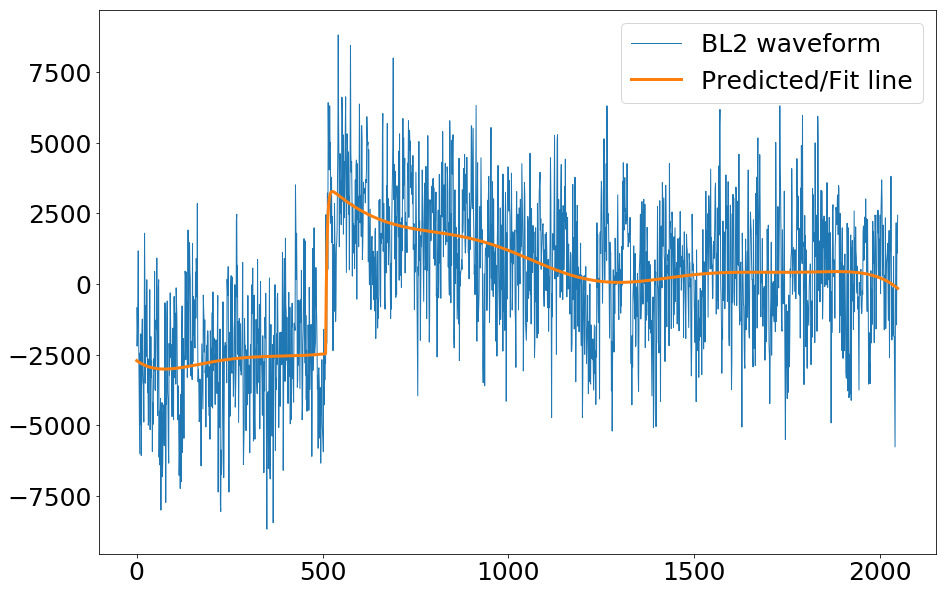

In [3]:
# Here I extract the coefficients, knowing only the functions that linearly combine to form the function
Data=d['wave'][i]
N=len(Data)
Design = np.transpose(np.matrix([np.transpose(linearCombine(N,1,0,0,0,0,0,0,0,0,0,0,0,0)),np.transpose(linearCombine(N,0,1,0,0,0,0,0,0,0,0,0,0,0)),np.transpose(linearCombine(N,0,0,1,0,0,0,0,0,0,0,0,0,0)),np.transpose(linearCombine(N,0,0,0,1,0,0,0,0,0,0,0,0,0)),np.transpose(linearCombine(N,0,0,0,0,1,0,0,0,0,0,0,0,0)),np.transpose(linearCombine(N,0,0,0,0,0,1,0,0,0,0,0,0,0)),np.transpose(linearCombine(N,0,0,0,0,0,0,1,0,0,0,0,0,0)),np.transpose(linearCombine(N,0,0,0,0,0,0,0,1,0,0,0,0,0)),np.transpose(linearCombine(N,0,0,0,0,0,0,0,0,1,0,0,0,0)),np.transpose(linearCombine(N,0,0,0,0,0,0,0,0,0,1,0,0,0)),np.transpose(linearCombine(N,0,0,0,0,0,0,0,0,0,0,1,0,0)),np.transpose(linearCombine(N,0,0,0,0,0,0,0,0,0,0,0,1,0)),np.transpose(linearCombine(N,0,0,0,0,0,0,0,0,0,0,0,0,1))]))
#print Design
prs=np.asanyarray(np.matmul(np.linalg.inv(np.matmul(np.transpose(Design),Design)),np.transpose(np.matmul(np.transpose(Design),Data))),dtype=float)
#print 'These are the output values from the above method \n',pars
#trap=np.zeros(len())
plt.figure(figsize=(15,10))
plt.plot(t,Data,label='BL2 waveform',lw=1)
plt.plot(t,linearCombine(N,*prs),lw=3,label='Predicted/Fit line')
prs[10]=0
plt.tick_params(labelsize=fs)
plt.legend(fontsize=fs)
plt.show()

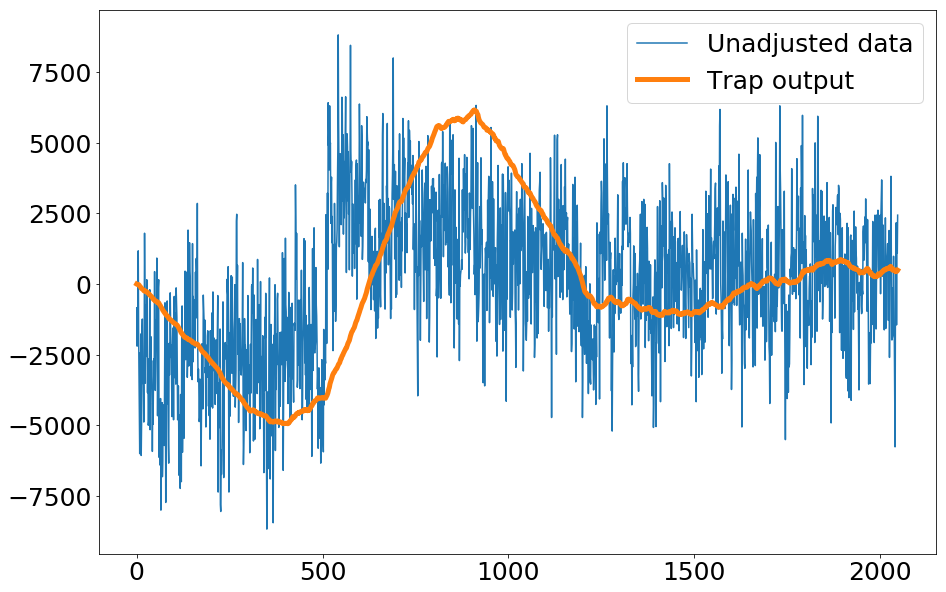

In [4]:
trp=np.zeros(len(Data))
rise,top,fall=300,100,fpars[0]
wo.trap(arr=trp,fall=536,rise=300,top=100,)
out=fftconvolve(Data,trp)[0:len(trp)]/float(rise*fall)
plt.figure(figsize=(15,10))
plt.plot(t,Data,label='Unadjusted data')
plt.plot(t,out,lw=5,label='Trap output')
#plt.plot(t,Data-linearCombine(N,*prs))
plt.tick_params(labelsize=fs)
plt.legend(fontsize=fs)
plt.show()

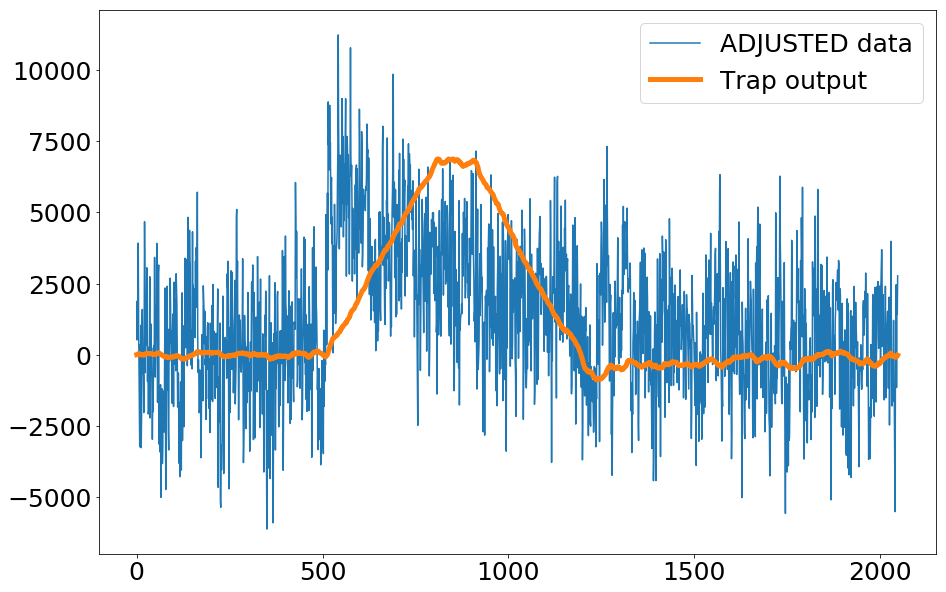

In [5]:
trp=np.zeros(len(Data))
rise,top,fall=300,100,fpars[0]
wo.trap(arr=trp,fall=536,rise=300,top=100,)
out=fftconvolve(Data-linearCombine(N,*prs),trp)[0:len(trp)]/float(rise*fall)
plt.figure(figsize=(15,10))
plt.plot(t,Data-linearCombine(N,*prs),label='ADJUSTED data')
plt.plot(t,out,lw=5,label='Trap output')
#plt.plot(t,Data-linearCombine(N,*prs))
plt.tick_params(labelsize=fs)
plt.legend(fontsize=fs)
plt.show()

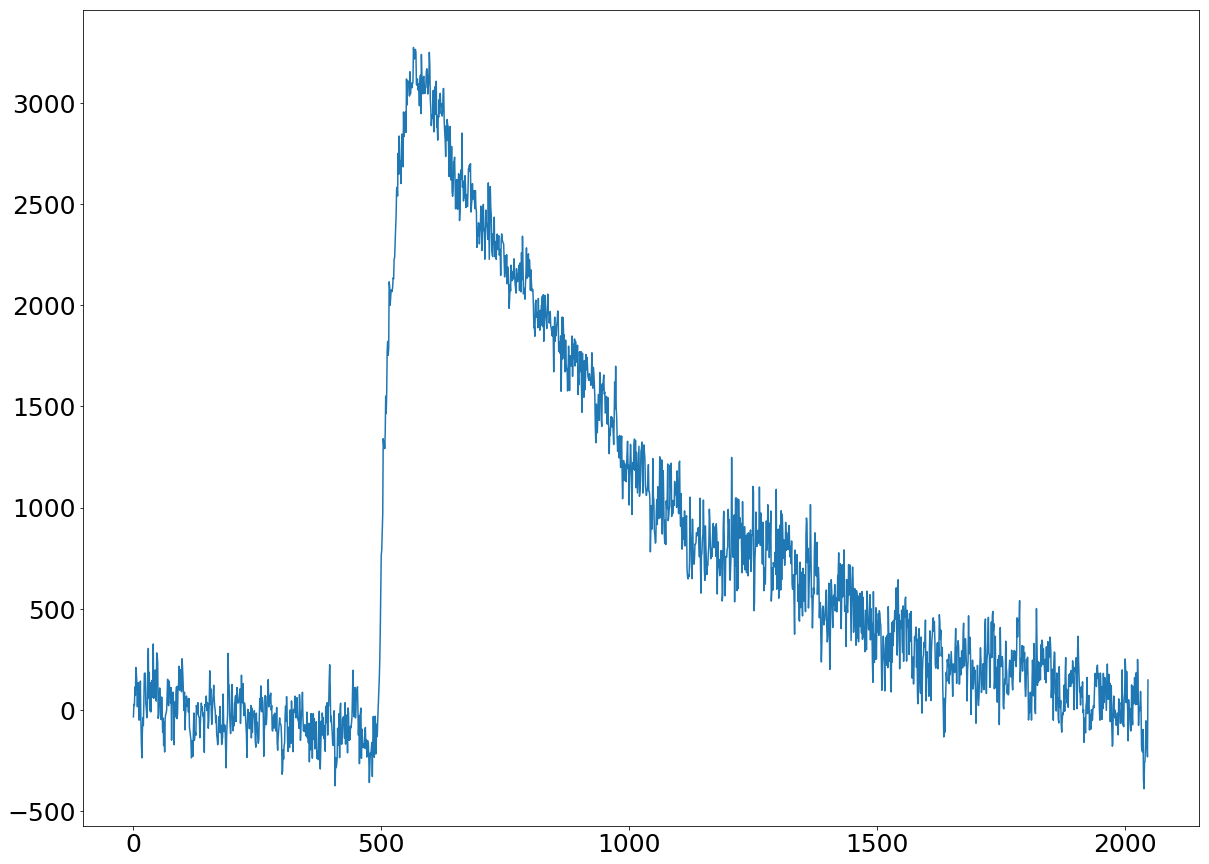

In [6]:
#IGNORE EVERYTHING BELOW, I WAS JUST PLAYING WITH A COUPLE OF THINGS

d=read.read_bl2('s_0537_r_000312_1.dat')
for i in range(len(d)):
    av=np.mean(d['wave'][i][0:300])
    d['wave'][i]-=int(av)
avwav=np.mean(d['wave'],axis=0)
plt.figure(figsize=(20,15))
plt.plot(t,avwav,label='average waveform')
plt.tick_params(labelsize=fs)

In [7]:
x=linearCombine(N,0,0,0,0,0,0,0,0,0,0,1000)
print pars
x=5000.*wave(np.arange(N,dtype=float),1,*pars[1:4])
plt.figure(figsize=(20,15))
plt.plot(np.arange(N),x)

TypeError: linearCombine() takes exactly 14 arguments (12 given)